# Regularized Regression

## Imports

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from sklearn.linear_model import Ridge, Lasso

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [5]:
plt.rc('font',   size=16)          # controls default text sizes
plt.rc('axes',   titlesize=18)     # fontsize of the axes title
plt.rc('axes',   labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=18)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=18)     # fontsize of the tick labels
plt.rc('legend', fontsize=18)      # legend fontsize
plt.rc('figure', titlesize=18)     # fontsize of the figure title

## Ridge regression

In [6]:
rng = np.random.default_rng(24)
N = 15
K = 2
x = np.sort(rng.uniform(0.0, 3.0, N))
ynoiseless = 0.5 + 0.5 * x + 0.1 * x**2
y = ynoiseless + rng.normal(0.0, 0.3, N)

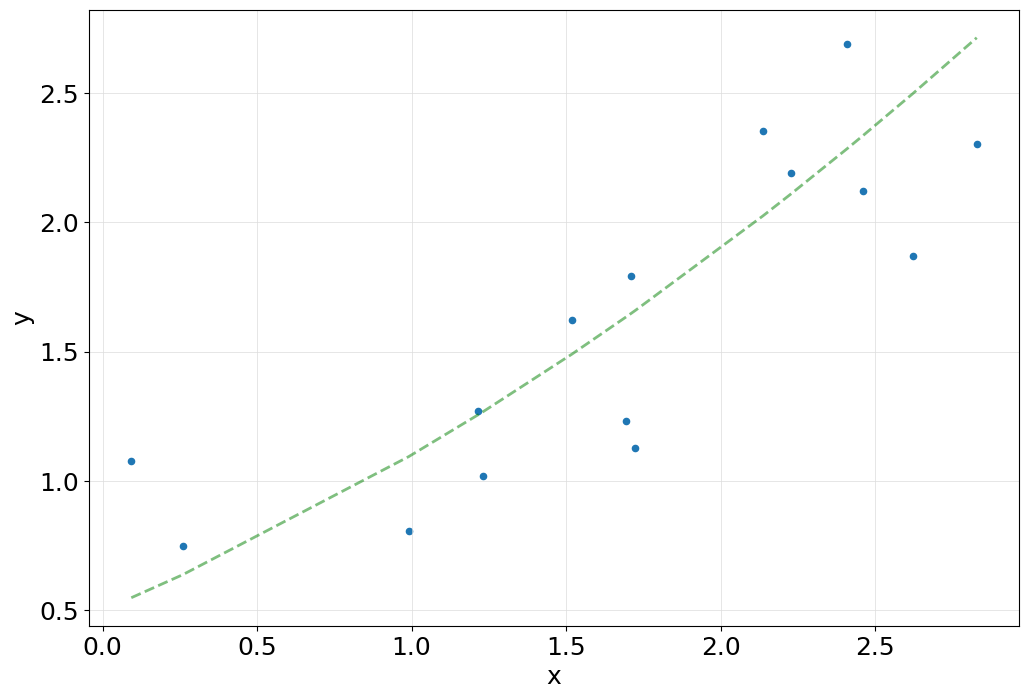

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(x, ynoiseless, c="green", linewidth=2, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [8]:
X = sm.add_constant(np.column_stack([x, x**2, x**3, x**4, x**5]))

In [9]:
myFit = sm.OLS(y, X).fit()

In [10]:
myFit.summary()

/Users/joris/miniconda3/envs/course/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     7.900
Date:                Thu, 29 Feb 2024   Prob (F-statistic):            0.00413
Time:                        00:26:25   Log-Likelihood:                -1.0240
No. Observations:                  15   AIC:                             14.05
Df Residuals:                       9   BIC:                             18.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2404      0.701      1.769      0.111      -0.346       2.827
x1            -2.4637      5.707     -0.432      0.676     -15.373      10.446
x2             3.4779     11.146      0.312      0.762     -21.735      28.691
x3            -1.9267      8.932     -0.216      0.834     -22.133      18.280
x4             0.6268      3.176      0.197      0.848      -6.559       7.813
x5            -0.0910      0.414     -0.220      0.831      -1.029       0.847
==============================================================================
Omnibus:                        0.945   Durbin-Watson:                   2.884
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.859
Skew:                          -0.426   Prob(JB):                        0.651
Kurtosis:                       2.195   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
xvalues = np.linspace(0, 3, 200)
designX = sm.add_constant(np.column_stack([xvalues, xvalues**2, xvalues**3, xvalues**4, xvalues**5]))
yvalues = designX @ myFit.params

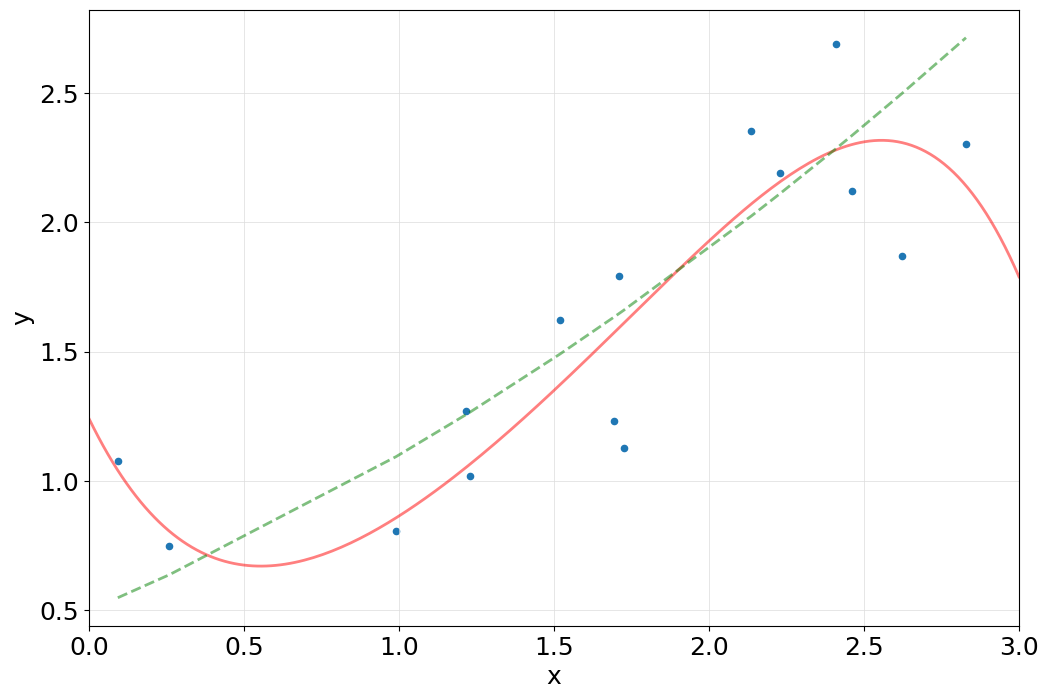

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(xvalues, yvalues, c="red", linewidth=2, alpha=0.5)
ax.plot(x, 0.5 + 0.5 * x + 0.1 * x**2, c="green", linewidth=2, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,3)
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Now fit the same model to the same dataset using Ridgre regression:

In [15]:
myRidge = Ridge(alpha=1, fit_intercept=True).fit(X, y)

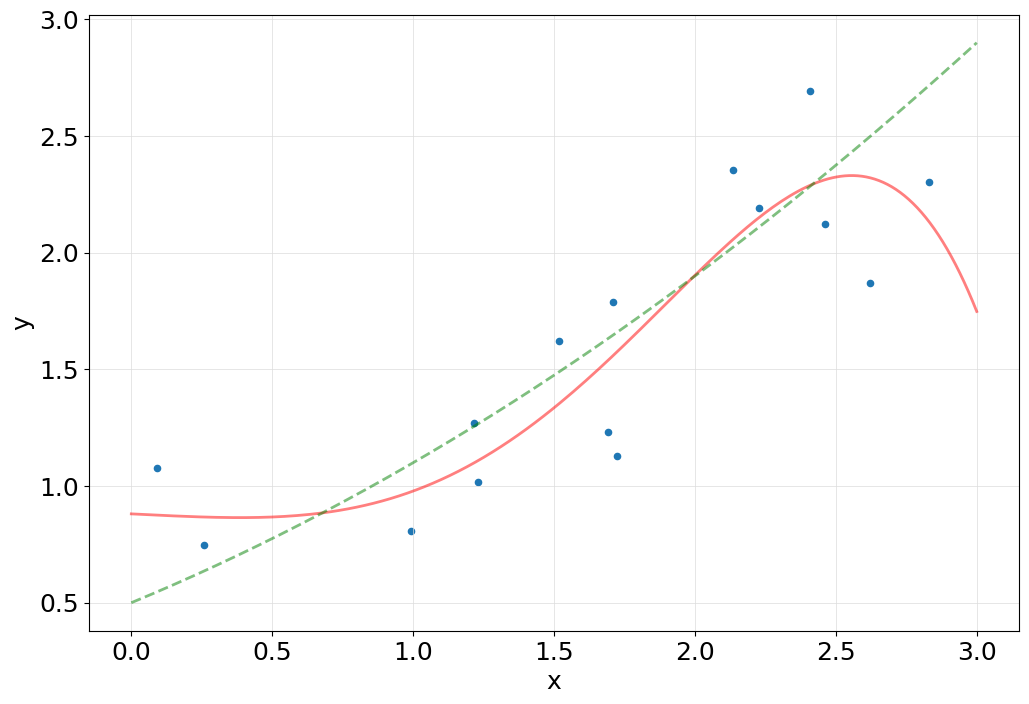

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(xvalues, myRidge.predict(designX), c="red", linewidth=2, alpha=0.5)
ax.plot(xvalues, 0.5 + 0.5 * xvalues + 0.1 * xvalues**2, c="green", linewidth=2, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Although we introduced bias for $\theta$, th led to a substantial decrease in the prediction error.

### Ridge estimator is biased but has a lower variance

Let's simulate going back to the lab and repeating the exact same experiment (with the same x-values) a 1000 times. The underlying function stays the same each time, but each time the noise realisation is different.

In [17]:
rng = np.random.default_rng(29)
M = 1000
olsCoef = np.zeros((M,6))                                 # Each time we keep the 6 OLS regression coefficients 
ridgeCoef = np.zeros((M,6))                               #           ... and the 6 ridge regression coefficients
for m in range(M):
    ynew = ynoiseless + rng.normal(0.0, 0.3, N)           # Each time a new noise realisatoin
    myFit = sm.OLS(ynew, X).fit()
    olsCoef[m] = myFit.params
    myRidge = Ridge(alpha=1, fit_intercept=True).fit(X, ynew)
    ridgeCoef[m] = myRidge.coef_
    ridgeCoef[m,0] = myRidge.intercept_                   # For ridge, we need to extract the intercept separately

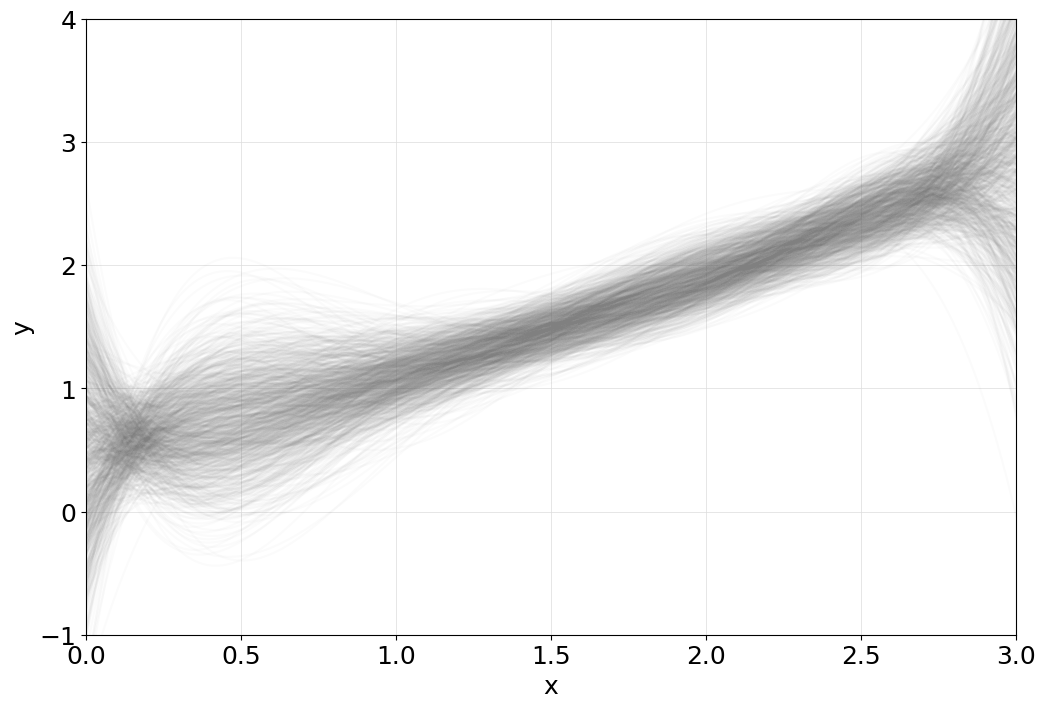

In [18]:
xvalues = np.linspace(0, 3, 200)
designX = sm.add_constant(np.column_stack([xvalues, xvalues**2, xvalues**3, xvalues**4, xvalues**5]))

fig, ax = plt.subplots(1,1, figsize=(12,8))
for m in range(M):
    yvalues = designX @ olsCoef[m]
    ax.plot(xvalues, yvalues, c="gray", alpha=0.03)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 3)
ax.set_ylim(-1,4)
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

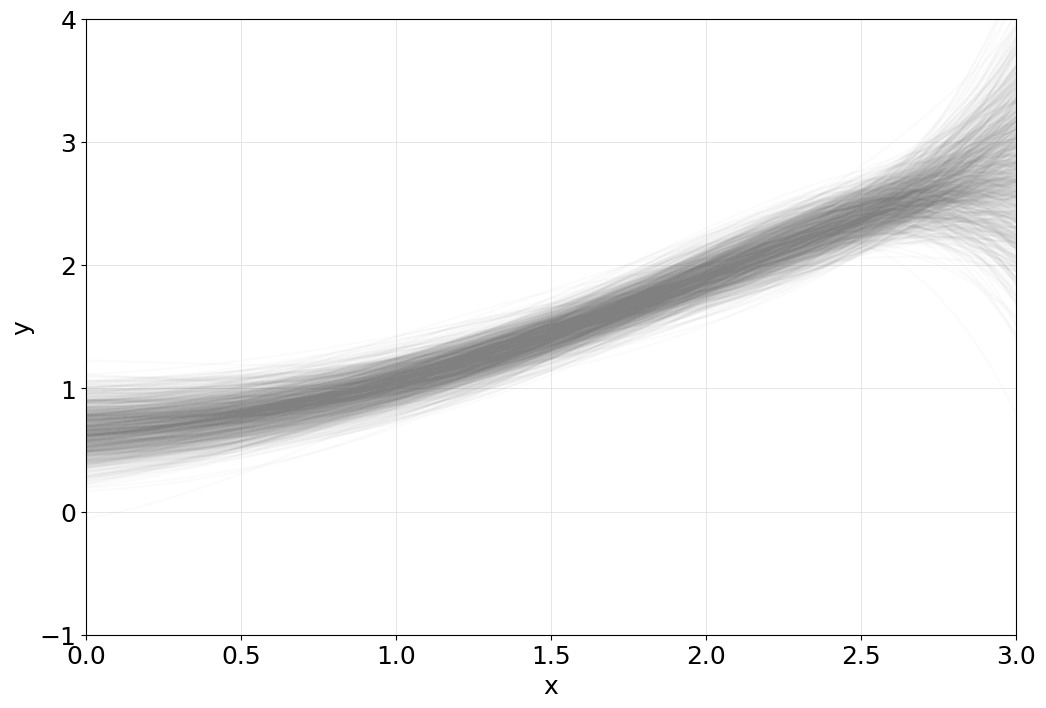

In [19]:
xvalues = np.linspace(0, 3, 200)
designX = sm.add_constant(np.column_stack([xvalues, xvalues**2, xvalues**3, xvalues**4, xvalues**5]))

fig, ax = plt.subplots(1,1, figsize=(12,8))
for m in range(M):
    yvalues = designX @ ridgeCoef[m]
    ax.plot(xvalues, yvalues, c="gray", alpha=0.03)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 3)
ax.set_ylim(-1,4)
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

So we sacrificed unbiasedness, but in return we got a solution that is less affected by the individual noise realisations.

### Determining $\lambda$

Two main possibilities:
1. Ridge trace
2. cross-validation (recommended, see example notebook on model selection)

Plotting the ridge trace:

In [20]:
lambdaValues = np.linspace(0.1, 10, 100) 
theta = np.zeros((len(lambdaValues), 6))
for n, alpha in enumerate(lambdaValues):
    myRidge = Ridge(alpha=alpha, fit_intercept=True).fit(X, y)
    theta[n] = myRidge.coef_

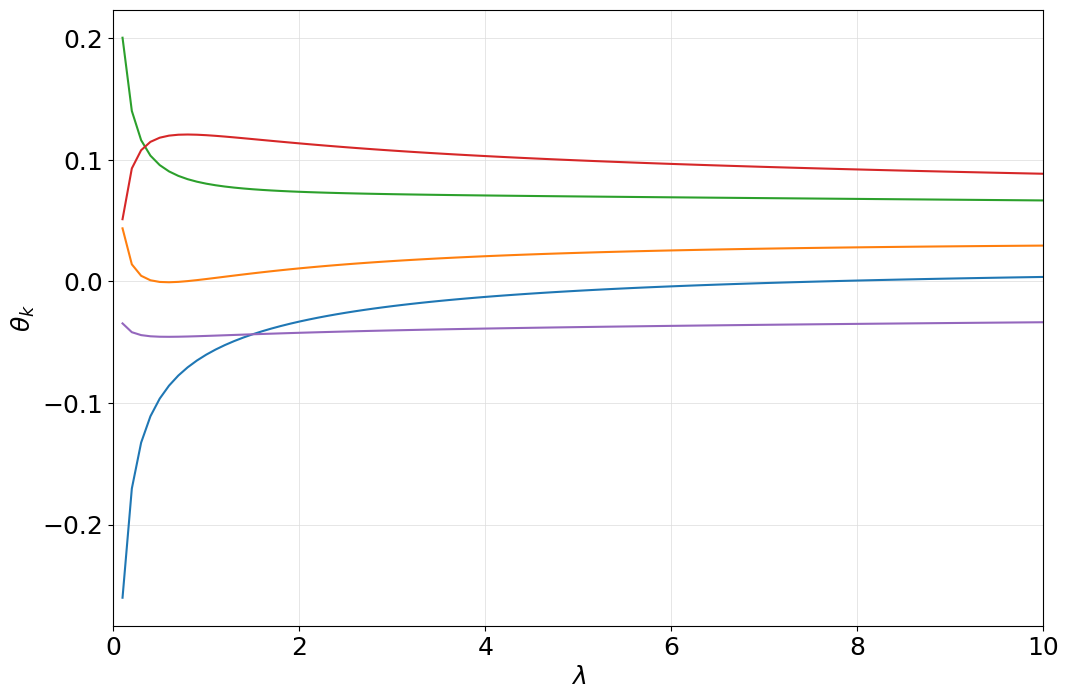

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
for k in range(1,6):
    ax.plot(lambdaValues, theta[:,k])
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\theta_k$')
ax.set_xlim(0,10)
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

***

## LASSO regression 

We use the same dataset and the same (polynomial) model as for Ridge regression.

In [36]:
rng = np.random.default_rng(24)
N = 15
K = 2
x = np.sort(rng.uniform(0.0, 3.0, N))
ynoiseless = 0.5 + 0.5 * x + 0.1 * x**2
y = ynoiseless + rng.normal(0.0, 0.3, N)

In [37]:
X = sm.add_constant(np.column_stack([x, x**2, x**3, x**4, x**5]))

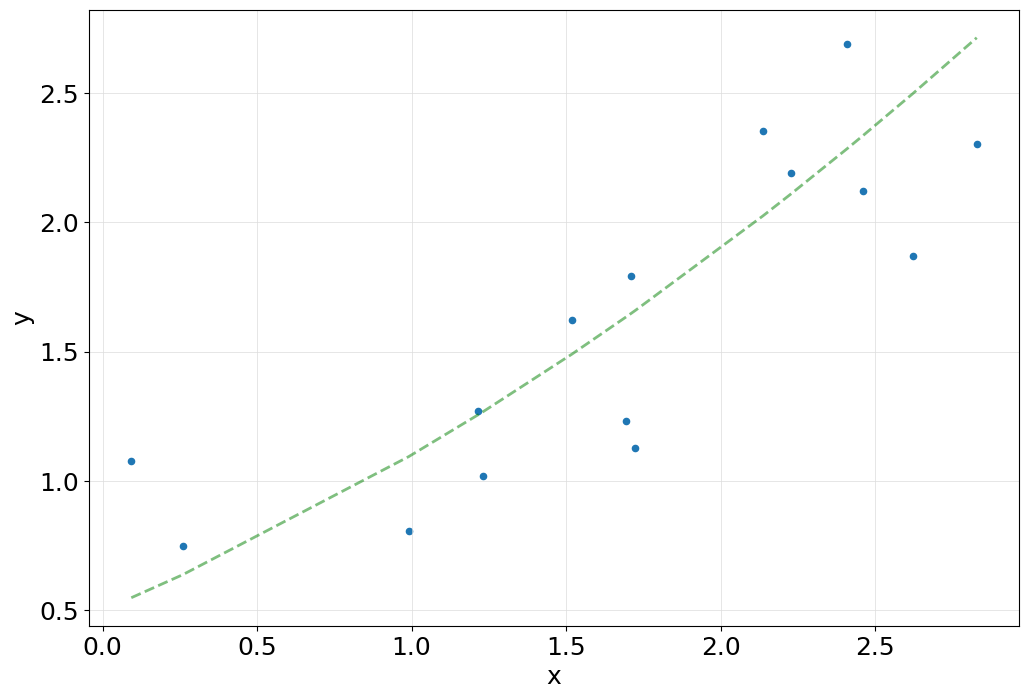

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(x, ynoiseless, c="green", linewidth=2, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [52]:
myLasso = Lasso(alpha = 0.6, fit_intercept=True)
myLasso.fit(X, y)
print(myLasso.coef_)
print(myLasso.intercept_)

[0.         0.         0.         0.         0.02240217 0.        ]
1.2211889676492083


In [53]:
xvalues = np.linspace(0, 3, 200)
designX = sm.add_constant(np.column_stack([xvalues, xvalues**2, xvalues**3, xvalues**4, xvalues**5]))

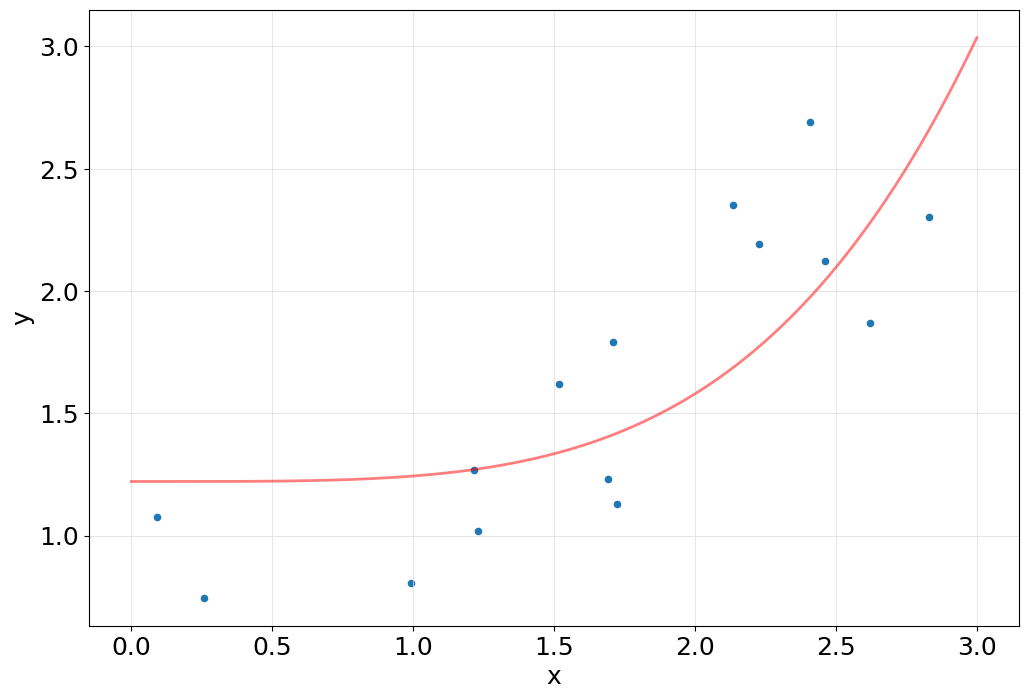

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(xvalues, myLasso.predict(designX), c="red", linewidth=2, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

***

## Elastic net regression

Again we use the same dataset as before:

In [29]:
rng = np.random.default_rng(24)
N = 15
K = 2
x = np.sort(rng.uniform(0.0, 3.0, N))
ynoiseless = 0.5 + 0.5 * x + 0.1 * x**2
y = ynoiseless + rng.normal(0.0, 0.3, N)

In [30]:
X = np.column_stack([x, x**2, x**3, x**4, x**5])       # without a constant, need to recenter anyway

Elastic nets assume that the data is standardized: 

In [31]:
Xmean = X.mean(axis=0)
Xstd = X.std(axis=0)
ymean = y.mean()
ystd = y.std()

Xscaled = (X - Xmean) / Xstd
yscaled = (y - ymean) / ystd

In [32]:
myModel = sm.OLS(yscaled,Xscaled)
myFit = myModel.fit_regularized(method='elastic_net', alpha=0.5, L1_wt=0.6)

The elastic net returns the parameter for the standardized data, so we need to transform them again to obtain the original fit parameters.

In [33]:
theta = myFit.params * ystd / Xstd
theta0 = ymean - np.dot(theta, Xmean)

Plot the result:

In [34]:
xvalues = np.linspace(0, 3, 200)
designX = np.column_stack([xvalues, xvalues**2, xvalues**3, xvalues**4, xvalues**5])
predictions = theta0 + designX @ theta

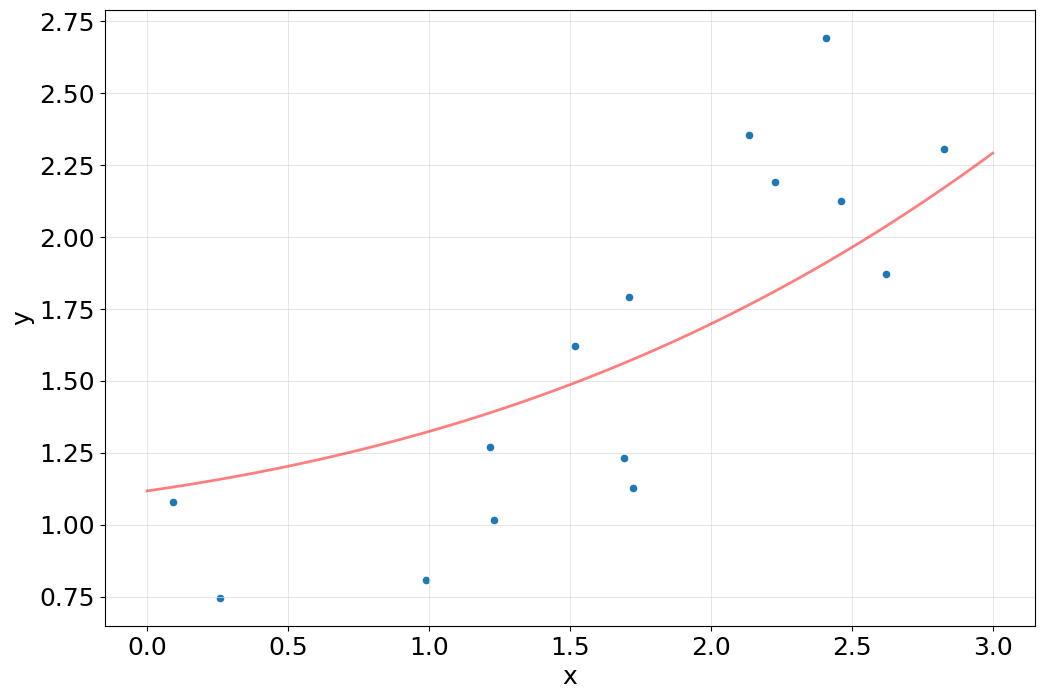

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20) 
ax.plot(xvalues, predictions, c="red", linewidth=2, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

***